### Aim:

Perform sentiment analysis on the news headlines.

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import re
import string

In [2]:
#read csv file
data = pd.read_csv('data/Eluvio_DS_Challenge.csv')
data[:10]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [3]:
#create the data frame
dataDF = pd.DataFrame(data)
dataDF

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


Let's check the categories of data provided to us.

In [4]:
categories = dataDF.groupby('category').size()
categories

category
worldnews    509236
dtype: int64

This means that the entire dataset consists of world news.

In [5]:
#create a new data frame with just headlines

df = dataDF['title']
df = pd.DataFrame(df)
df = df.rename(columns={'title': 'headlines'})
df

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jump-start economy: Give health care to all
4,Council of Europe bashes EU&UN terror blacklist
5,Hay presto! Farmer unveils the illegal mock-...
6,"Strikes, Protests and Gridlock at the Poland-U..."
7,The U.N. Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


### Data Cleaning

Before we head to modelling our data, we need to clean it. We will correct things like punctuation, remove html links etc. We also remove duplicate rows the dataframe.

In [6]:
headlinesDF = df.drop_duplicates()
headlinesDF = headlinesDF.reset_index(drop=True)
headlinesDF

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jump-start economy: Give health care to all
4,Council of Europe bashes EU&UN terror blacklist
5,Hay presto! Farmer unveils the illegal mock-...
6,"Strikes, Protests and Gridlock at the Poland-U..."
7,The U.N. Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


In [7]:
headlinesDF['headlines'].str.find('http')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
500690   -1
500691   -1
500692   -1
500693   -1
500694   -1
500695   -1
500696   -1
500697   -1
500698   -1
500699   -1
500700   -1
500701   -1
500702   -1
500703   -1
500704   -1
500705   -1
500706   -1
500707   -1
500708   -1
500709   -1
500710   -1
500711   -1
500712   -1
500713   -1
500714   -1
500715   -1
500716   -1
500717   -1
500718   -1
500719   -1
Name: headlines, Length: 500720, dtype: int64

As we can see, there aren't any url associated with the headlines. Therefore, there is no need to remove it from the headlines. However, we can remove it just to be safe.

In [8]:
#remove url
def removeURL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [9]:
headlinesDF['headlines']=headlinesDF['headlines'].apply(lambda x : removeURL(x))
headlinesDF['headlines'].str.find('http')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
500690   -1
500691   -1
500692   -1
500693   -1
500694   -1
500695   -1
500696   -1
500697   -1
500698   -1
500699   -1
500700   -1
500701   -1
500702   -1
500703   -1
500704   -1
500705   -1
500706   -1
500707   -1
500708   -1
500709   -1
500710   -1
500711   -1
500712   -1
500713   -1
500714   -1
500715   -1
500716   -1
500717   -1
500718   -1
500719   -1
Name: headlines, Length: 500720, dtype: int64

In [10]:
#remove html tags
def removeHTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

In [11]:
headlinesDF['headlines']=headlinesDF['headlines'].apply(lambda x : removeHTML(x))
headlinesDF['headlines'].str.find('http')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
500690   -1
500691   -1
500692   -1
500693   -1
500694   -1
500695   -1
500696   -1
500697   -1
500698   -1
500699   -1
500700   -1
500701   -1
500702   -1
500703   -1
500704   -1
500705   -1
500706   -1
500707   -1
500708   -1
500709   -1
500710   -1
500711   -1
500712   -1
500713   -1
500714   -1
500715   -1
500716   -1
500717   -1
500718   -1
500719   -1
Name: headlines, Length: 500720, dtype: int64

In [12]:
#remove punctuation
def removePunctuation(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [13]:
headlinesDF['headlines']=headlinesDF['headlines'].apply(lambda x : removePunctuation(x))
headlinesDF['headlines'].str.find(':')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
500690   -1
500691   -1
500692   -1
500693   -1
500694   -1
500695   -1
500696   -1
500697   -1
500698   -1
500699   -1
500700   -1
500701   -1
500702   -1
500703   -1
500704   -1
500705   -1
500706   -1
500707   -1
500708   -1
500709   -1
500710   -1
500711   -1
500712   -1
500713   -1
500714   -1
500715   -1
500716   -1
500717   -1
500718   -1
500719   -1
Name: headlines, Length: 500720, dtype: int64

In [14]:
headlinesDF

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jumpstart economy Give health care to all
4,Council of Europe bashes EUUN terror blacklist
5,Hay presto Farmer unveils the illegal mockTu...
6,Strikes Protests and Gridlock at the PolandUkr...
7,The UN Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


From the DataFrame, we observe that all punctuations, html links if any, etc are not present in the DataFrame.

### Polarity definition using TextBlob

Before starting with the sentiment analysis, we need to classify the titles as positive, negative and neutral.

In [15]:
# Importing TextBlob
from textblob import TextBlob

In [16]:
sentence = 'Scores killed in Pakistan clashes'
# Creating a textblob object and assigning the sentiment property
analysis = TextBlob(sentence).sentiment[0] #0 gives polarity, 1 gives subjectivity
print(analysis)

-0.2


In [17]:
# negative values indicate negative sentiments, positive values indicate positive sentiments
def sentimentAnalysis(row):
    analysis = TextBlob(row).sentiment.polarity
    return analysis

In [18]:
headlinesDF['polarity'] = headlinesDF["headlines"].apply(sentimentAnalysis)

In [19]:
headlinesDF

,headlines,polarity
0,Scores killed in Pakistan clashes,-0.200000
1,Japan resumes refuelling mission,0.000000
2,US presses Egypt on Gaza border,0.000000
3,Jumpstart economy Give health care to all,0.000000
4,Council of Europe bashes EUUN terror blacklist,0.000000
5,Hay presto Farmer unveils the illegal mockTu...,-0.450000
6,Strikes Protests and Gridlock at the PolandUkr...,0.000000
7,The UN Mismanagement Program,0.000000
8,Nicolas Sarkozy threatens to sue Ryanair,0.000000
9,US plans for missile shields in Polish town me...,0.000000


In [20]:
#let's define the values for polarity as follows: 
# 0  : neutral
# -1 : negative
# 1 : positive

def polarChange(row):
    polar = 0
    
    if row < 0:
        polar = -1
    if row > 0:
        polar = 1
    if row == 0:
        polar = 0
    
    return polar


In [21]:
headlinesDF['polarVal'] = headlinesDF["polarity"].apply(polarChange)
headlinesDF

,headlines,polarity,polarVal
0,Scores killed in Pakistan clashes,-0.200000,-1
1,Japan resumes refuelling mission,0.000000,0
2,US presses Egypt on Gaza border,0.000000,0
3,Jumpstart economy Give health care to all,0.000000,0
4,Council of Europe bashes EUUN terror blacklist,0.000000,0
5,Hay presto Farmer unveils the illegal mockTu...,-0.450000,-1
6,Strikes Protests and Gridlock at the PolandUkr...,0.000000,0
7,The UN Mismanagement Program,0.000000,0
8,Nicolas Sarkozy threatens to sue Ryanair,0.000000,0
9,US plans for missile shields in Polish town me...,0.000000,0


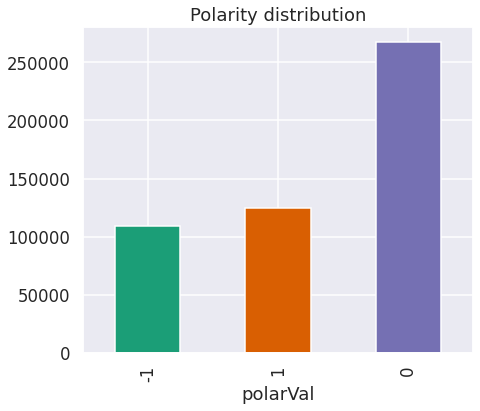

In [22]:
#Now that we have the simplified polairty, let's check the polarity distribution
plot = headlinesDF.groupby('polarVal').count()['polarity'].sort_values().plot(kind= 'bar', title = 'Polarity distribution', figsize =(7,6))
plt.show()

We have more neutral headings in comparison to positive and negative headings in this dataset. This may lead to biased learning. Therefore, let's sample the data to equalize the class size. However, before jumping into class equalization, we need to convert the text to numbers without losing information. 

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline

In [24]:
#assign polarVal as y
y = headlinesDF['polarVal']
yDF = pd.DataFrame(y)
yDF = yDF.rename(columns={'polarVal': 'y'})
yDF

,y
0,-1
1,0
2,0
3,0
4,0
5,-1
6,0
7,0
8,0
9,0


In [25]:
#assign headlines as X
X = headlinesDF['headlines']
xDF = pd.DataFrame(X)
xDF

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jumpstart economy Give health care to all
4,Council of Europe bashes EUUN terror blacklist
5,Hay presto Farmer unveils the illegal mockTu...
6,Strikes Protests and Gridlock at the PolandUkr...
7,The UN Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


In [26]:
xDF.shape

(500720, 1)

In [27]:
# create the transform for text to integers
vectorizer = TfidfVectorizer(strip_accents = 'unicode', ngram_range = (2,2), analyzer = 'word',stop_words = "english")
# tokenize and build vocab
xFeatures = vectorizer.fit_transform(xDF['headlines'])

In [28]:
xFeatures.shape

(500720, 2283684)

### Dimensionality Reduction

The dimensionality of the dataset is very high, therefore, we reduce the dimensionality using SVD.

In [29]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 1000)
xFeaturesSVD = svd.fit_transform(xFeatures)

In [30]:
xFeaturesSVD.shape

(500720, 1000)

### Class equalisation using SMOTE

In [31]:
overSample = SMOTE()
randomOS = RandomOverSampler()
pipelineS = Pipeline([('overSample',overSample)])
totalDF,y = pipelineS.fit_resample(xFeaturesSVD,yDF)

In [32]:
totalDF.shape

(801201, 1000)

In [33]:
yDF = pd.DataFrame(y)
yDF

,y
0,-1
1,0
2,0
3,0
4,0
5,-1
6,0
7,0
8,0
9,0


In [34]:
yDF['y'].value_counts()

-1    267067
 1    267067
 0    267067
Name: y, dtype: int64

Now we have an equiclass dataset.

### Classification using ML algorithms

In [35]:
X_train, X_test, y_train, y_test = train_test_split(totalDF, 
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier , VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


In [37]:
modelLog = LogisticRegression()
modelLog.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_predLog = modelLog.predict(X_test)
accuracy_score(y_test, y_predLog)

0.4640697449466741

In [40]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_predKNN = modelKNN.predict(X_test)
accuracy_score(y_test, y_predKNN)

0.6294394068933669

In [42]:
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)

GaussianNB()

In [43]:
y_predGNB = modelGNB.predict(X_test)
accuracy_score(y_test, y_predGNB)

0.38614337154660794

In [44]:
modelADA = AdaBoostClassifier()
modelADA.fit(X_train,y_train)

AdaBoostClassifier()

In [45]:
y_predADA = modelADA.predict(X_test)
accuracy_score(y_test, y_predADA)

0.4159422370055105

#### Voting Classifiers

As we observed, the individual accuracy of KNN is the best amongst the classifiers we tried. Let's try combining all three using a voting classifier and check its accuracy.

In [46]:
knn = KNeighborsClassifier(n_neighbors=2)
gnb = GaussianNB()
log = LogisticRegression(multi_class='ovr')

classifiers = [('knn',knn), ('gnb', gnb), ('log', log)]

In [47]:
voting = VotingClassifier(estimators = classifiers, voting='soft')

In [48]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('gnb', GaussianNB()),
                             ('log', LogisticRegression(multi_class='ovr'))],
                 voting='soft')

In [49]:
predTest = voting.predict(X_test)

In [51]:
accuracy_score(y_test, predTest)

0.5265256707084953

From this experiment, we can conclude that K-Nearest Neighbours is the best classifier for this dataset because of the measured accuracy. If we want to try another method, we can use BERT. However, as I've worked with it before, I experimented with these. 

This link to my BERT NLP project is here: https://github.com/bhaktichowkwale/ML_NLP/blob/main/CMPE_IP_NLP.ipynb